#**Classification**
https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/train.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56837,56838,Male,42,1,5.0,0,1-2 Year,No,22330.0,124.0,93,0
56838,56839,Male,30,1,41.0,1,< 1 Year,No,36904.0,152.0,154,0
56839,56840,Female,49,1,28.0,1,1-2 Year,No,48016.0,26.0,251,0
56840,56841,Female,23,1,35.0,1,< 1 Year,No,35697.0,152.0,129,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56842 entries, 0 to 56841
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    56842 non-null  int64  
 1   Gender                56842 non-null  object 
 2   Age                   56842 non-null  int64  
 3   Driving_License       56842 non-null  int64  
 4   Region_Code           56842 non-null  float64
 5   Previously_Insured    56842 non-null  int64  
 6   Vehicle_Age           56842 non-null  object 
 7   Vehicle_Damage        56842 non-null  object 
 8   Annual_Premium        56842 non-null  float64
 9   Policy_Sales_Channel  56842 non-null  float64
 10  Vintage               56842 non-null  int64  
 11  Response              56842 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 5.2+ MB


In [5]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
df1 = df.drop(['id'], axis=1)
df1

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
56837,Male,42,1,5.0,0,1-2 Year,No,22330.0,124.0,93,0
56838,Male,30,1,41.0,1,< 1 Year,No,36904.0,152.0,154,0
56839,Female,49,1,28.0,1,1-2 Year,No,48016.0,26.0,251,0
56840,Female,23,1,35.0,1,< 1 Year,No,35697.0,152.0,129,0


In [8]:
df1['Gender'].value_counts()

Male      30619
Female    26223
Name: Gender, dtype: int64

In [9]:
df1['Gender'] = df1['Gender'].map({
    'Male' : 0,
    'Female' : 1
})

In [10]:
df1

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
56837,0,42,1,5.0,0,1-2 Year,No,22330.0,124.0,93,0
56838,0,30,1,41.0,1,< 1 Year,No,36904.0,152.0,154,0
56839,1,49,1,28.0,1,1-2 Year,No,48016.0,26.0,251,0
56840,1,23,1,35.0,1,< 1 Year,No,35697.0,152.0,129,0


In [19]:
df1.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
56837    False
56838    False
56839    False
56840    False
56841    False
Length: 56842, dtype: bool

In [21]:
dupstest = df1.duplicated()
print(f'no. of duplicate rows = {dupstest.sum()}')
df1[dupstest]

no. of duplicate rows = 6


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
35754,0,23,1,15.0,0,< 1 Year,No,2630.0,152.0,173,0
41515,0,39,1,30.0,0,1-2 Year,Yes,2630.0,124.0,27,0
43618,0,40,1,28.0,1,1-2 Year,No,2630.0,124.0,209,0
44049,0,39,1,28.0,0,1-2 Year,Yes,2630.0,124.0,64,0
44203,0,44,1,28.0,0,> 2 Years,Yes,2630.0,124.0,155,1
47314,1,39,1,28.0,0,1-2 Year,Yes,2630.0,26.0,157,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


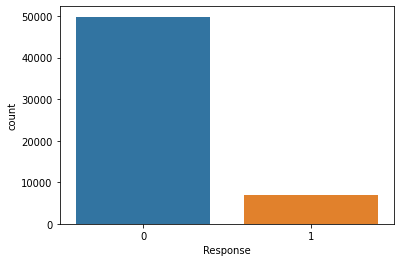

In [18]:
sns.countplot(df1['Response'], label="count")

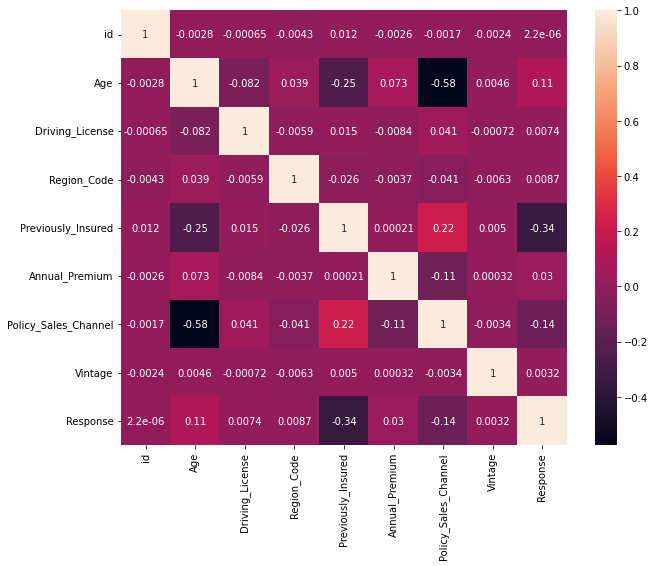

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

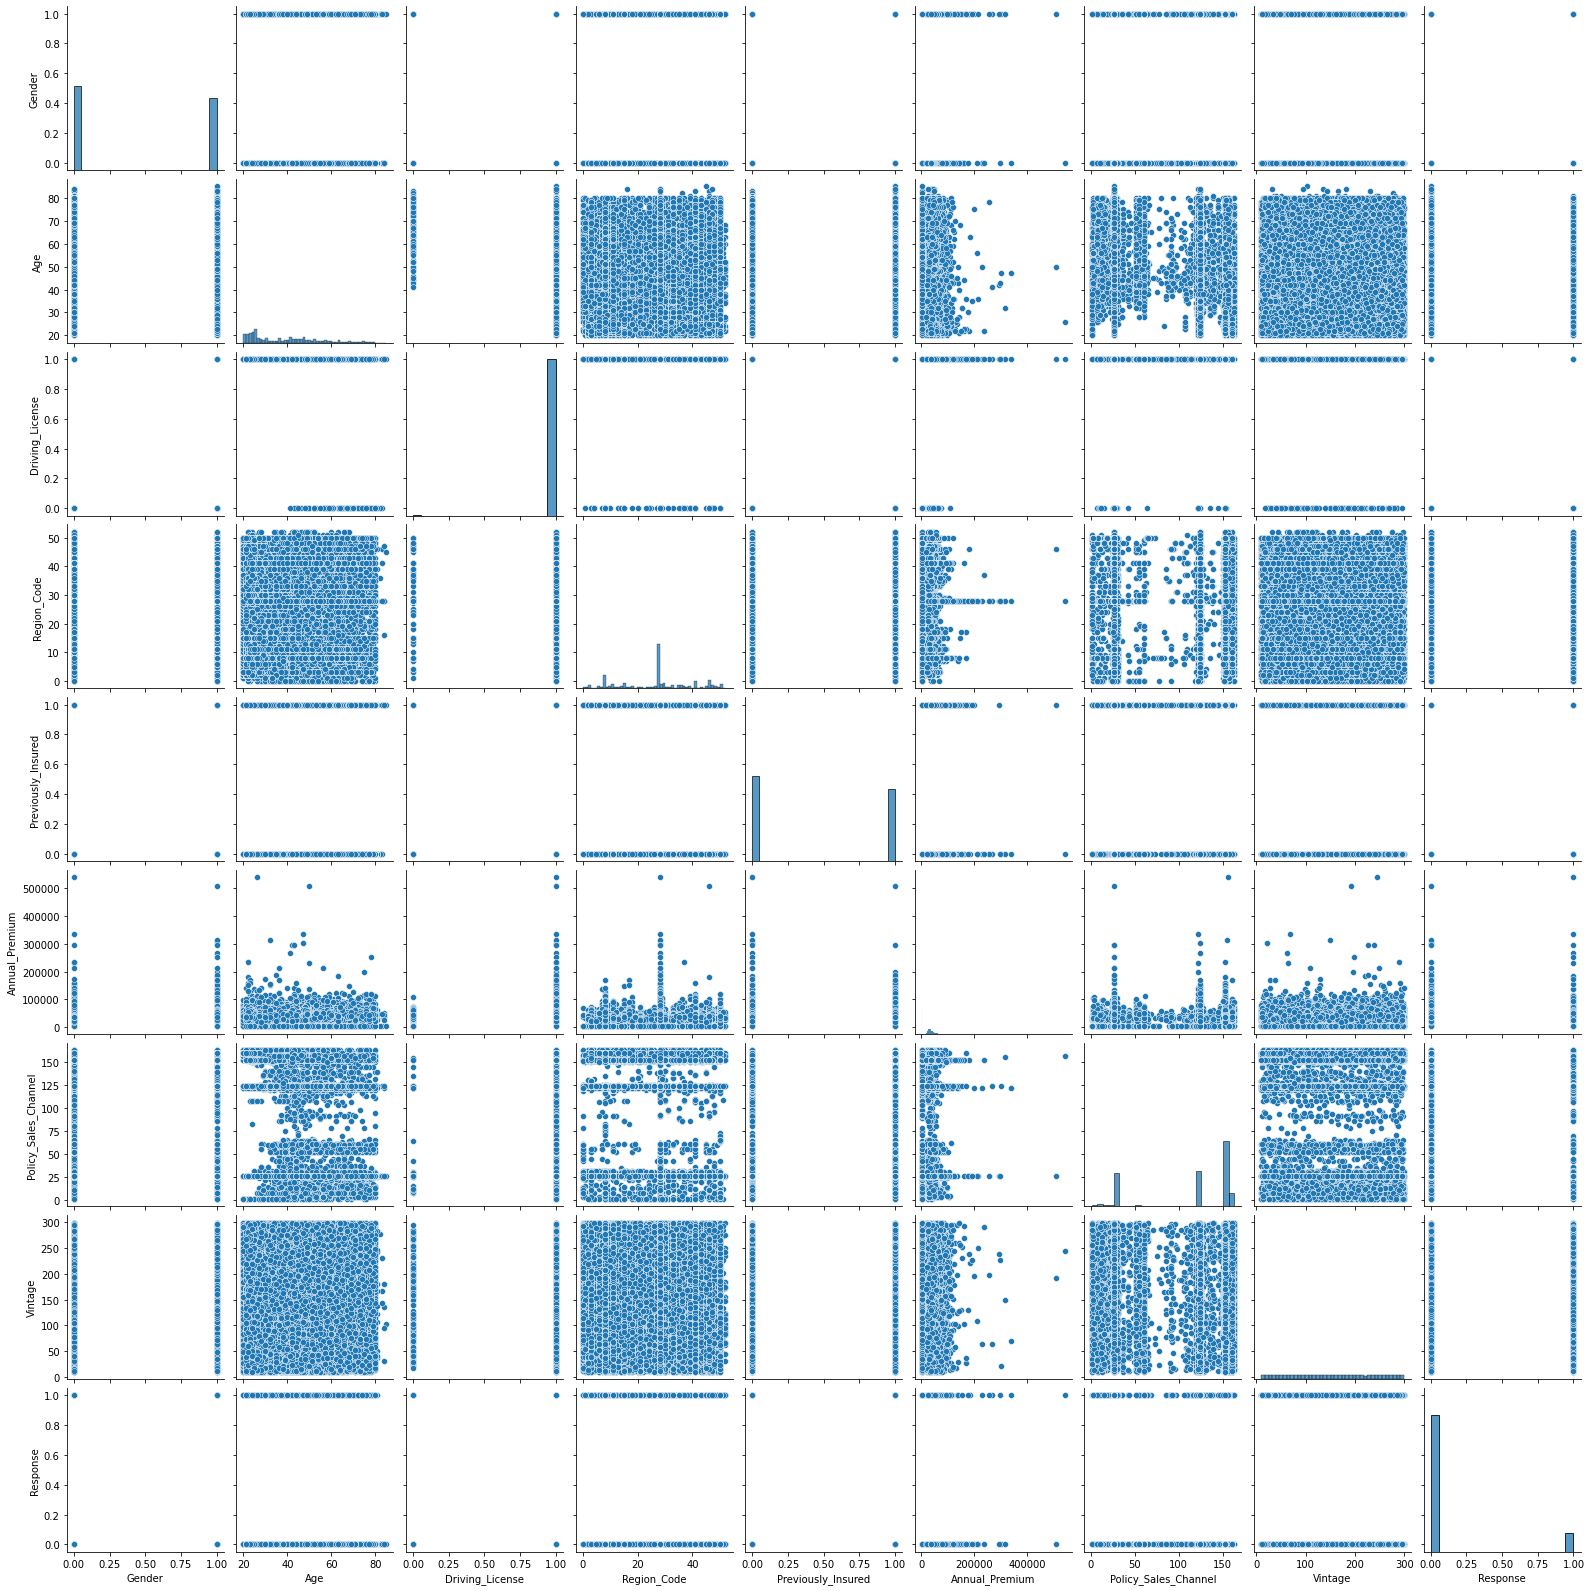

In [23]:
sns.pairplot(df1)
plt.show()

In [26]:
df1['Vehicle_Age'].value_counts()

1-2 Year     29782
< 1 Year     24688
> 2 Years     2372
Name: Vehicle_Age, dtype: int64

In [27]:
df1['Vehicle_Damage']=df1['Vehicle_Damage'].replace(('No', 'Yes'), (0,1))
df1['Vehicle_Age']=df1['Vehicle_Age'].replace(('< 1 Year', '1-2 Year', '> 2 Years'), (0,1,2))

In [30]:
df1.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [31]:
df1['Region_Code'] = df1['Region_Code'].astype("int64")
df1['Annual_Premium'] = df1['Annual_Premium'].astype("int64")
df1['Policy_Sales_Channel'] = df1['Policy_Sales_Channel'].astype()

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56842 entries, 0 to 56841
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                56842 non-null  int64  
 1   Age                   56842 non-null  int64  
 2   Driving_License       56842 non-null  int64  
 3   Region_Code           56842 non-null  int64  
 4   Previously_Insured    56842 non-null  int64  
 5   Vehicle_Age           56842 non-null  int64  
 6   Vehicle_Damage        56842 non-null  int64  
 7   Annual_Premium        56842 non-null  float64
 8   Policy_Sales_Channel  56842 non-null  float64
 9   Vintage               56842 non-null  int64  
 10  Response              56842 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 4.8 MB


In [28]:
x = df1.drop(['Response'], axis=1)
y= df1['Response']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)